<div style="text-align: center;">
    <img src="img/logo.png" width="400" alt="logo_uba">
</div>

**Alumnos:** <br />
Pablo Martin Gomez Verdini - gomezpablo86@gmail.com <br />
Diego Paciotti Iacchelli - diegopaciotti@gmail.com  <br />
Joaquin Gonzalez - joagonzalez@gmail.com <br />

**Repositorio Github**<br />
https://github.com/FIUBA-CEIA-18Co2024/IIA-TP2 <br />


In [38]:
# Setup
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stats

# Carga del dataset
housing = fetch_california_housing()

print(f'Data shape: {housing.data.shape}\nTarget shape: {housing.target.shape}')
print(f'Features: {housing.feature_names}')

Data shape: (20640, 8)
Target shape: (20640,)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [2]:
# Se crea el dataframe con los features
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

# Se agrega la columna target al dataframe 
df['Target'] = housing.target

# Cálculo de la matriz de correlación
correlation_matrix = df.corr()

# Matriz de correlación
print('Matriz de correlación (Full)')
print(correlation_matrix)
print('\n')

# Correlación feature-feature
print('Correlación entre features:')
print(correlation_matrix.loc[housing.feature_names, housing.feature_names])
print('\n')

# Correlación feature-target
print('Correlación entre features y el target:')
correlation_matrix_features_target = correlation_matrix['Target'].loc[housing.feature_names]
correlation_matrix_features_target.name = 'Target'
print(pd.DataFrame(correlation_matrix_features_target))
print('\n')

Matriz de correlación (Full)
              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
Target      0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude    Target  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0

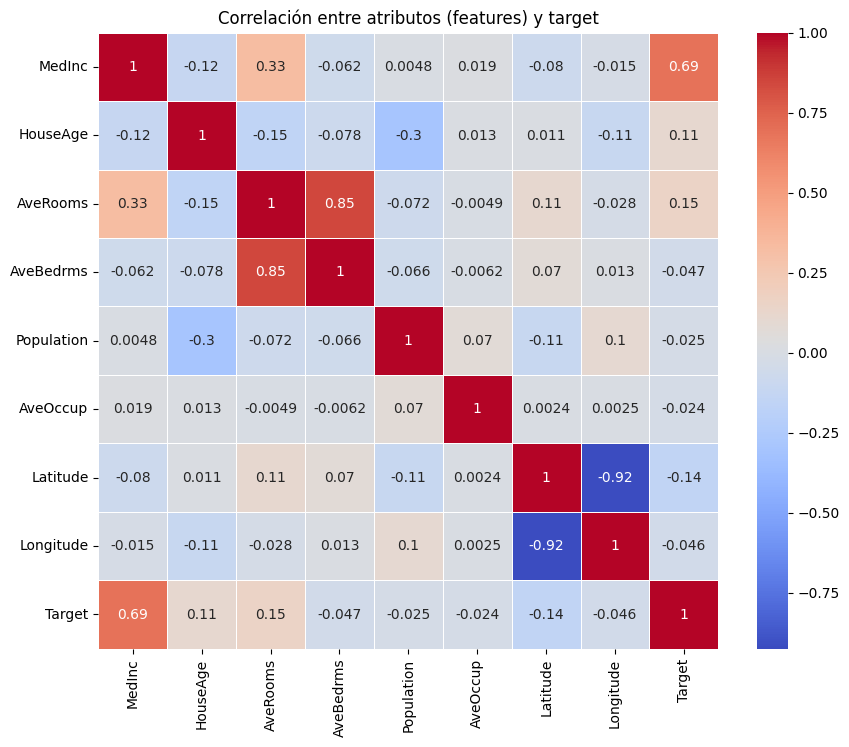

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.title('Correlación entre atributos (features) y target')
plt.show()

### Analisis de los resultados obtenidos

El ingreso medio (MedInc) tiene la mayor correlación positiva con el target (Mediana del valor de las casas) con un valor de 0,69. Esto indica que a medida que el ingreso aumenta, también lo hará el valor de las casas, lo cual es intuitivo dado que las zonas con mayores ingresos suelen tener las viviendas de mayor precio.

En menor medida, el promedio de habitaciones (AveRooms) y la antigüedad de la casa (HouseAge), también tienen una correlación positiva con el atributo target. Esto sugiere que si bien hay influencia de estos features en el precio, lo hacen débilmente. 

La latitud (Latitud)también posee una correlación negativa débil con el precio de las casas. Esto podría indicar que las viviendas ubicadas más al norte tienden a tener un previo más bajo.

El resto de los features presentan una correlación muy débil con el valor de las casas, mostrando una influencia limitada sobre esta.

Con respecto a la correlación entre features, el promedio de habitaciones (AveRooms) y el promedio de dormitorios (AveBedrms) poseen un valor muy elevado (0,85), lo cual es lógico dado que viviendas con más habitaciones suelen tener más dormitorios. 

La correlación elevada pero negativa entre longitud y latitud puede atribuirse a la forma que tiene el estado de California. Al observarse en un mapa, puede notarse que al disminuir la latitud (Movimiento hacia el Sur) la longitud aumentará (Movimiento hacia el Este).

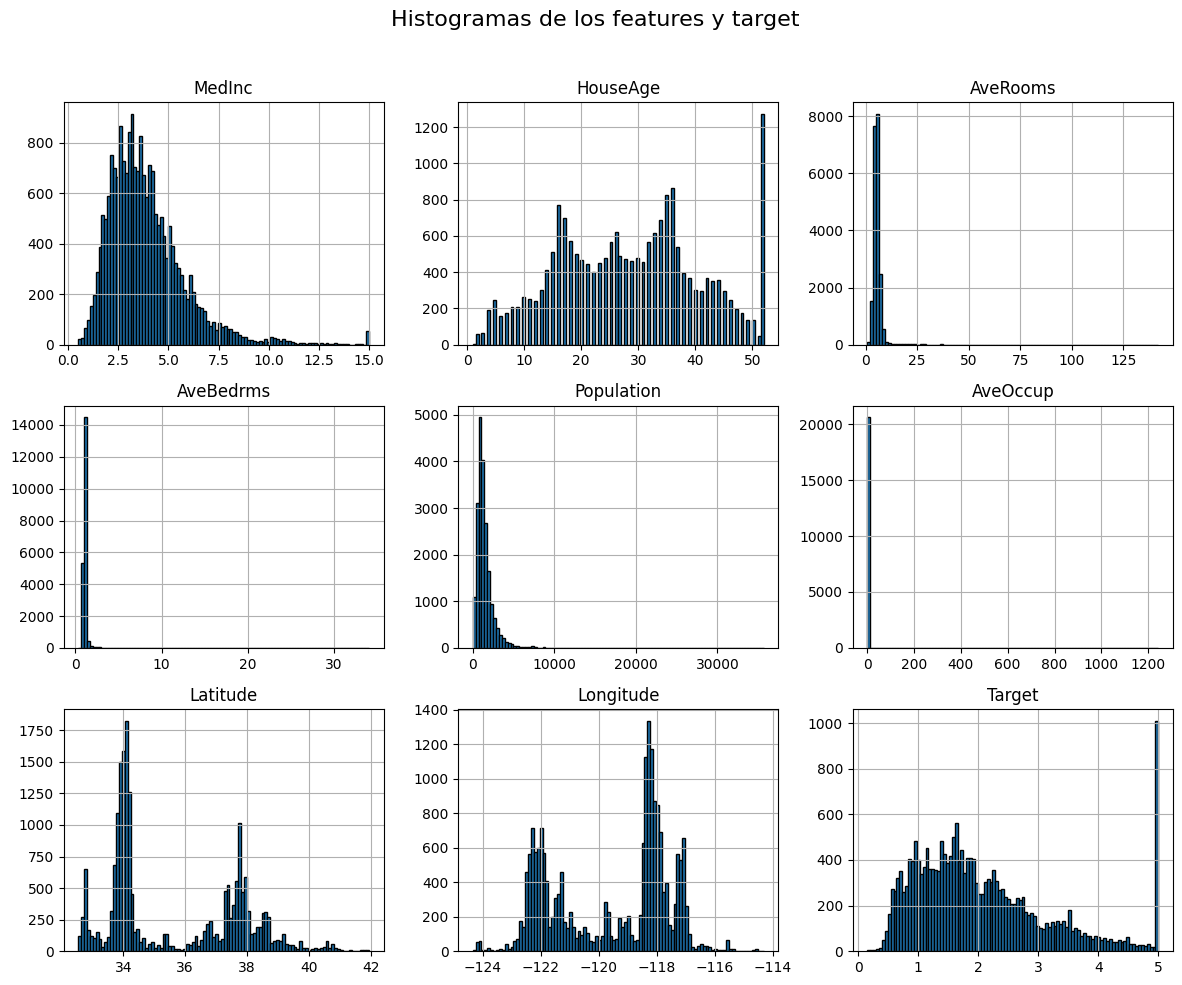

In [6]:
# Plot de los histogramas de cada feature y target
df.hist(bins=100, figsize=(12, 10), edgecolor='black')

# Mostrar histogramas generados
plt.suptitle('Histogramas de los features y target', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Analisis de los resultados obtenidos

- MedInc (Ingreso medio en el bloque):

Este feature muestra una distribución sesgada a la derecha (sesgo positivo). La mayoría de los valores se concentran aproximadamente entre 0 y 6, pero hay algunas áreas de mayor ingreso que extienden la cola hacia la derecha. No es una distribución gaussiana, ya que está muy sesgada.

- HouseAge (Antigüedad mediana de las casas en el bloque):

La distribución es más o menos uniforme, excepto por el pico en la edad máxima (alrededor de 50 años), lo que probablemente refleja áreas con viviendas más antiguas.

- AveRooms (Promedio de habitaciones):

La distribución está fuertemente sesgada hacia la derecha (sesgo positivo). La mayoría de las casas tienen menos de 10 habitaciones, pero algunos pocos valores atípicos tienen significativamente más, extendiendo la cola hacia la derecha. No es una distribución gaussiana.

- AveBedrms (Promedio de dormitorios):

Este feature también muestra una distribución sesgada hacia la derecha. La mayoría de los puntos de datos están agrupados cerca de valores más bajos (menos dormitorios), con algunos valores atípicos que se extienden hacia números muy grandes de dormitorios.

- Population (Población en el bloque):

Puede observarse una distribución fuertemente sesgada hacia la derecha. La mayoría de las áreas tienen poblaciones pequeñas, pero hay algunas áreas con poblaciones muy grandes, creando una larga cola hacia la derecha. No sigue una distribución gaussiana.

- AveOccup (Promedio de ocupación por hogar):

Otra distribución fuertemente sesgada hacia la derecha, donde la mayoría de los valores están agrupados alrededor de un número bajo, y hay muy pocos hogares con tasas de ocupación extremadamente altas. No es gaussiana.

- Latitude (Latitud):

Los valores de latitud parecen estar agrupados en varios grupos distintos, lo que probablemente refleja diferentes regiones geográficas de California. Esta distribución parece bimodal asimétrica, pero no es gaussiana.

- Longitude (Longitud):

Al igual que la latitud, la longitud muestra múltiples picos, lo que sugiere varios grupos geográficos, pero la distribución está más dispersa que la latitud aunque podría también considerarse una bimodal asimétrica. No sigue una distribución gaussiana.

- Target (Mediana del valor de las casas en el  bloque):

La variable target parece tener un sesgo a la derecha pero más leve que en los features anteriores. Hay un pico alrededor de 1.5 y 2.0, con una cola que se extiende hacia valores más altos. En 5 puede visualizarse un pico máximo que se corresponde con el valor límite del dataset. Es decir, todos los bloques cuyas medianas del valor de las casas son iguales o mayores a 500.000 USD se agrupan en ese sector. 


In [12]:
X_train, X_test, y_train, y_test = train_test_split(housing.data,  housing.target, test_size=0.3, random_state=42)
# Escalemos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformemos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=housing['feature_names'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=housing['feature_names'])
X_train_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.133506,0.509357,0.181060,-0.273850,-0.184117,-0.010825,-0.805682,0.780934
1,-0.532218,-0.679873,-0.422630,-0.047868,-0.376191,-0.089316,-1.339473,1.245270
2,0.170990,-0.362745,0.073128,-0.242600,-0.611240,-0.044800,-0.496645,-0.277552
3,-0.402916,-1.155565,0.175848,-0.008560,-0.987495,-0.075230,1.690024,-0.706938
4,-0.299285,1.857152,-0.259598,-0.070993,0.086015,-0.066357,0.992350,-1.430902


In [23]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train_scaled, y_train)
y_train_pred = LinearRegression_model.predict(X_train_scaled)

In [28]:
residuos = y_train - y_train_pred
varianza_total = np.var(y_train, ddof=1)  # ddof=1 para el cálculo de varianza muestral
varianza_explicada = varianza_total - np.var(residuos, ddof=1)
print("Varianza Total {}: Esto representa la dispersión completa de los valores del target (y_train). Es una medida de cuánta variabilidad hay en los precios de las viviendas".format(varianza_total))
print("Varianza Explicada ({}): Es la cantidad de variabilidad en el target que el modelo de regresión lineal puede explicar utilizando las características del conjunto de datos".format(varianza_explicada))

Varianza Total 1.3397887092485838: Esto representa la dispersión completa de los valores del target (y_train). Es una medida de cuánta variabilidad hay en los precios de las viviendas
Varianza Explicada (0.8163948543798047): Es la cantidad de variabilidad en el target que el modelo de regresión lineal puede explicar utilizando las características del conjunto de datos


* Proporción Explicada: El modelo explica 0.816 de 1.339, lo cual corresponde aproximadamente al 61% de la varianza total. Dicho de otro modo, el modelo está logrando explicar una cantidad considerable de la variabilidad en el target, pero no toda.
* Varianza No Explicada (0.523): La parte restante (0.523) sugiere que hay una porción significativa de la variabilidad del target que el modelo no puede explicar. Esto podría deberse a varios factores, como:
    * Relaciones No Lineales: El modelo de regresión lineal asume una relación lineal entre los atributos y el target. Si la relación es más compleja, este modelo no será capaz de capturar todos los patrones presentes.
    * Ruido en los Datos: Los datos podrían tener ruido o variabilidad aleatoria que no puede ser predicha por el modelo, lo cual es común en datos del mundo real.
    * Que los residuos no tengan una distribución normal -> Heterocedasticidad: La heterocedasticidad se da cuando la variabilidad de los residuos no es constante a lo largo del rango de valores de las predicciones. Esto viola uno de los supuestos de la regresión lineal y podría sugerir que un ajuste lineal no es el más apropiado o que se necesita algún tipo de transformación de los datos.


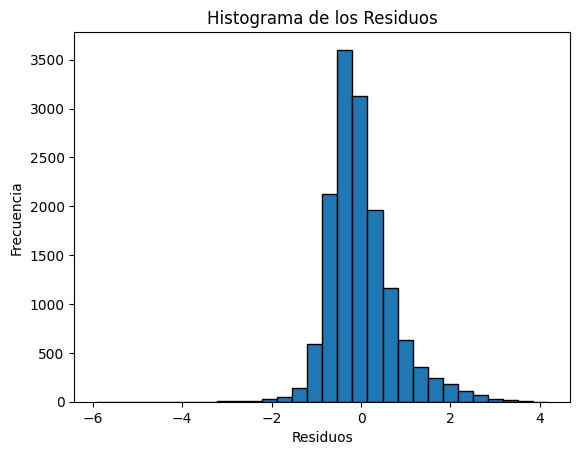

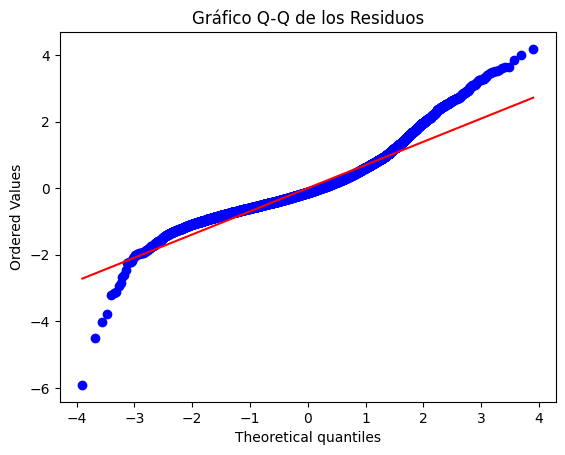

In [32]:
plt.hist(residuos, bins=30, edgecolor='k')
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de los Residuos")
plt.show()

stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de los Residuos")
plt.show()

In [37]:
y_test_pred = LinearRegression_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.5306
Mean Absolute Error (MAE): 0.5272
Coeficiente de Determinación (R²): 0.5958


1. Mean Squared Error (MSE): $\frac{1}{N} * \sum (y_{[i]} - \hat{y_{[i]}})^2 = 0.5306$.
El Error Cuadrático Medio (MSE) mide el promedio de los errores al cuadrado entre los valores reales (y_test) y los valores predichos (y_test_pred). En este caso, el valor es 0.5306.
* El MSE amplifica los errores más grandes debido a la operación de elevar al cuadrado, lo que significa que el modelo tiene algunos errores significativos al predecir los valores de salida.
* Dado que no tenemos un contexto exacto sobre el rango del target (y_test), es difícil saber si 0.5306 es un valor "alto" o "bajo". Sin embargo, valores más pequeños indican un mejor ajuste. Puedes comparar el MSE del set de entrenamiento con el del set de evaluación para evaluar la consistencia del modelo.
2. Mean Absolute Error (MAE): $\frac{1}{N} * \sum |y_{[i]} - \hat{y_{[i]}}| = 0.5272$.
El Error Absoluto Medio (MAE) mide la media de las diferencias absolutas entre los valores reales y los valores predichos, y en este caso es 0.5272.
* El MAE te da una medida directa del error promedio en la misma escala que el target (y_test). Esto significa que, en promedio, el modelo se desvía de los valores reales en aproximadamente 0.5272 unidades.
* A diferencia del MSE, el MAE no amplifica los errores grandes, por lo que es una métrica útil para interpretar el error típico sin dejarse llevar por los outliers. En general, cuanto más pequeño sea el valor de MAE, mejor será la capacidad del modelo para aproximar los valores reales.
3. Coeficiente de Determinación (R²): $\frac{S_R}{S_T} = 0.5958$.
El $R^2$ mide la proporción de la varianza del target que el modelo es capaz de explicar. En este caso, es 0.5958.
* Un $R^2$ de 0.5958 indica que aproximadamente el 59.58% de la varianza en el target (y_test) puede ser explicada por el modelo utilizando los atributos proporcionados. Esto significa que el modelo tiene un desempeño moderado en términos de explicar la variabilidad de los datos.
* Un $R^2$ del 59.58% es algo razonable, pero no excelente. Muestra que el modelo captura una parte significativa de la relación entre las características y el target, pero todavía hay un 40.42% de la varianza que el modelo no puede explicar. Esto podría deberse a que:
    * Las relaciones entre los atributos y el target no son lineales y un modelo de regresión lineal no logra capturarlas adecuadamente.
    * Atributos importantes no están incluidos en el dataset o el modelo tiene una capacidad limitada para extraer la información relevante debido a la naturaleza del ajuste lineal.

In [46]:

mse = []
for alpha in range(0, 125):
    ridge_model = Ridge(alpha=alpha/10)
    mse.append(cross_val_score(ridge_model, X_train_scaled, y=y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1))
display(mse)

[array([-0.54787556, -0.500835  , -0.52045639, -0.51612252, -0.54883741]),
 array([-0.54787435, -0.50083621, -0.52045782, -0.51612148, -0.54883582]),
 array([-0.54787314, -0.50083741, -0.52045926, -0.51612044, -0.54883424]),
 array([-0.54787194, -0.50083863, -0.5204607 , -0.51611941, -0.54883266]),
 array([-0.54787075, -0.50083984, -0.52046215, -0.51611838, -0.54883109]),
 array([-0.54786955, -0.50084106, -0.5204636 , -0.51611736, -0.54882952]),
 array([-0.54786837, -0.50084228, -0.52046505, -0.51611634, -0.54882795]),
 array([-0.54786718, -0.50084351, -0.5204665 , -0.51611532, -0.54882639]),
 array([-0.547866  , -0.50084473, -0.52046796, -0.51611431, -0.54882484]),
 array([-0.54786483, -0.50084596, -0.52046942, -0.5161133 , -0.54882329]),
 array([-0.54786366, -0.5008472 , -0.52047089, -0.51611229, -0.54882174]),
 array([-0.54786249, -0.50084844, -0.52047235, -0.51611129, -0.54882019]),
 array([-0.54786133, -0.50084968, -0.52047382, -0.51611029, -0.54881865]),
 array([-0.54786017, -0.5

In [54]:
alpha_values = np.linspace(0, 12.5, 100)
#mse = np.array([])
mse = []
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    #mse = np.append(mse, cross_val_score(ridge_model, X_train_scaled, y=y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1))
    mse.append(cross_val_score(ridge_model, X_train_scaled, y=y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1))


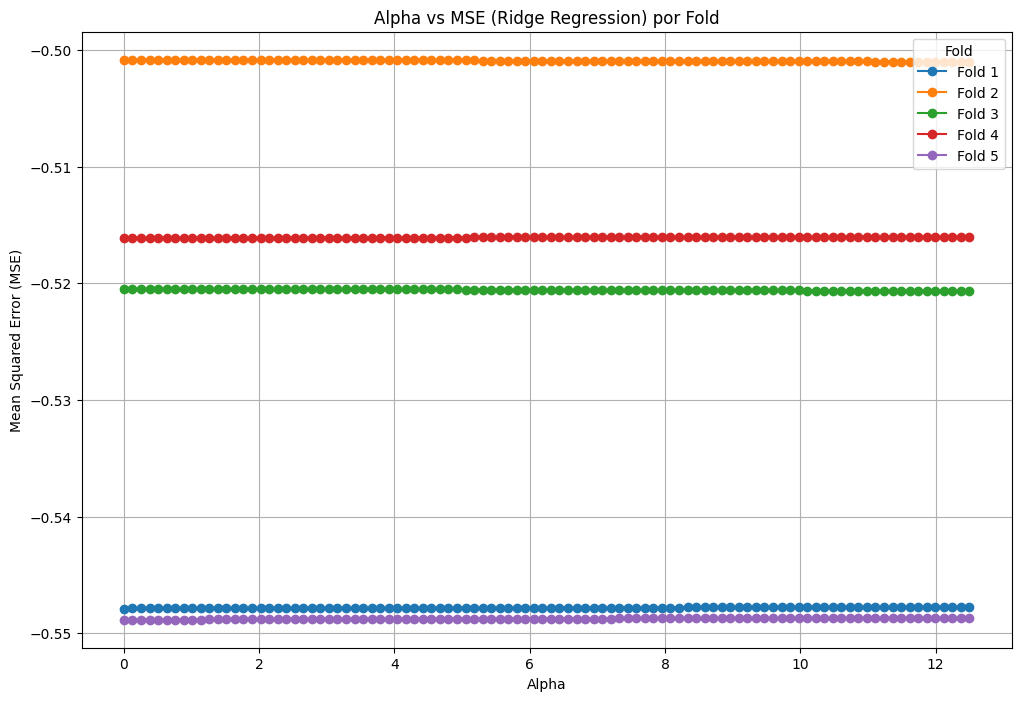

In [58]:
plt.figure(figsize=(12, 8))
for fold_idx in range(5):  # Itera sobre cada fold
    fold_mse_values = [mse_value[fold_idx] for mse_value in mse]  # Extrae los MSE de cada alpha para el fold actual
    plt.plot(alpha_values, fold_mse_values, marker='o', linestyle='-', label=f'Fold {fold_idx + 1}')

plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Alpha vs MSE (Ridge Regression) por Fold")
plt.legend(title="Fold")
plt.grid(True)
plt.show()